In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [4]:
df['FullDate'] = pd.to_datetime(df['FullDate'])
df.dtypes

FullDate     datetime64[ns]
Tmax                float64
SysLoad             float64
GasPrice            float64
ElecPrice           float64
dtype: object

In [5]:
df.rename(columns = {'FullDate':'ds', 'ElecPrice':'y'}, inplace = True)

In [6]:
df= df[['ds', 'y', 'SysLoad', 'Tmax', 'GasPrice']]

In [7]:
df.set_index( "ds" , inplace= True)

In [8]:
df = df.resample('D').sum()

In [9]:
df.head()

,y,SysLoad,Tmax,GasPrice
ds,,,,
2010-09-01,2751.700,41565.380,379.2,88.56
2010-09-02,570.810,38898.990,369.6,88.56
2010-09-03,504.975,41665.760,439.2,106.80
2010-09-04,502.275,35638.085,328.8,81.36
2010-09-05,500.555,35611.410,357.6,106.80


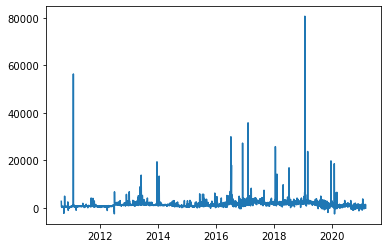

In [10]:
plt.plot(df.index, df.y)

In [11]:
#  Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df.SysLoad)

print( f'p-value: {round(adf_result[1], 6)}')


p-value: 0.004254


In [12]:
# 
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df.GasPrice)

print( f'p-value: {round(adf_result[1], 6)}')

p-value: 0.045027


In [14]:
#   Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df.GasPrice)

print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {round(v, 4)} ' )

Critical Values:
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


In [15]:
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df.GasPrice)

print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {round(v, 4)} ' )

Critical Values:
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


In [16]:
from statsmodels.tsa.stattools import adfuller 

adf_result = adfuller(df.y)

print( 'Critical Values:' ) 
for k, v in adf_result[ 4 ].items(): 
 print( f' {k} : {round(v, 4)} ' )

Critical Values:
 1% : -3.4321 
 5% : -2.8623 
 10% : -2.5672 


In [17]:
df_train = df.iloc[:2757]
df_test = df.iloc[2757:]

In [18]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [19]:
df_train.dtypes

ds          datetime64[ns]
y                  float64
SysLoad            float64
Tmax               float64
GasPrice           float64
dtype: object

In [20]:
from fbprophet import Prophet
model = Prophet() 
model.fit(df_train[['ds', 'y']])

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
df_test_pred = df_test[['ds']]